autoencoders 

Because the model is forced to prioritize
which aspects of the input should be copied, it often learns useful properties of the
data.

there are 26 000 of data. 
we should train NN to clean noise from data: 

there are 20 000 clean training set, 2000 clean validation set, 2000 noisy validation set, 

2000 noisy test set to clean 

why we are given so many clean set without noised version?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras, keras.layers as L
with np.load('denoising-challenge-01-data.npz') as fh:
    training_images_clean = fh['training_images_clean']
    validation_images_noisy = fh['validation_images_noisy']
    validation_images_clean = fh['validation_images_clean']
    test_images_noisy = fh['test_images_noisy']

# TRAINING DATA: CLEAN
# 1. INDEX: IMAGE SERIAL NUMBER (20000)
# 2. INDEX: COLOR CHANNEL (1)
# 3/4. INDEX: PIXEL VALUE (28 x 28)
print(training_images_clean.shape, training_images_clean.dtype)

# VALIDATION DATA: CLEAN + NOISY
print(validation_images_clean.shape, validation_images_clean.dtype)
print(validation_images_noisy.shape, validation_images_noisy.dtype)

# TEST DATA: NOISY
print(test_images_noisy.shape, test_images_noisy.dtype)

/home/gaini/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(20000, 1, 28, 28) float32
(2000, 1, 28, 28) float32
(2000, 1, 28, 28) float32
(2000, 1, 28, 28) float32


In [2]:
img_shape = [1,28,28]
print(img_shape)

[1, 28, 28]


In [3]:
def build_deep_autoencoder(img_shape,code_size=32):
    """PCA's deeper brother. See instructions above"""
    C, H,W = img_shape
    
    encoder = keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))

    encoder.add(L.Flatten())
    encoder.add(L.Dense(code_size*8, activation='relu'))
    encoder.add(L.Dense(code_size*4, activation='tanh'))
    encoder.add(L.Dense(code_size*2, activation='tanh'))
    encoder.add(L.Dense(code_size))


    decoder = keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))

    decoder.add(L.Dense(code_size*2, activation='tanh'))
    decoder.add(L.Dense(code_size*4, activation='tanh'))
    decoder.add(L.Dense(code_size*8))
    decoder.add(L.Dense(np.prod(img_shape), activation='relu'))
    decoder.add(L.Reshape(img_shape))

    return encoder,decoder

In [4]:
encoder,decoder = build_deep_autoencoder(img_shape,code_size=32)

inp = L.Input(img_shape)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.models.Model(inp,reconstruction)
autoencoder.compile('adamax','mse')



In [6]:
delta_validation = validation_images_noisy - validation_images_clean

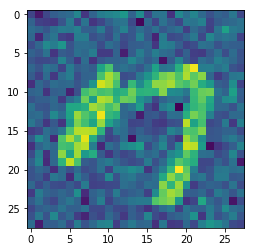

In [20]:
plt.imshow(validation_images_clean[0][0] + delta_validation[0][0])

In [37]:
noise_data = delta_validation[0:2][0]
noise_data_flattened = noise_data.flatten()
noise_data_flattened.shape

np.mean(noise_data_flattened)
np.std(noise_data_flattened)

0.20203866

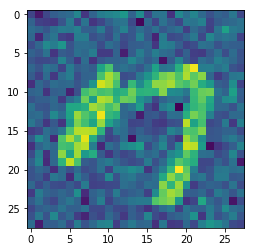

In [22]:
plt.imshow(validation_images_noisy[0][0])

In [39]:


def apply_gaussian_noise(X,sigma=0.20):
    """
    adds noise from normal distribution with standard deviation sigma
    :param X: image tensor of shape [batch,height,width,3]
    """
    
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
        
    return X + noise

training_images_noisy = apply_gaussian_noise(training_images_clean)

In [41]:
autoencoder.fit(x=training_images_noisy,y=training_images_clean,epochs=10,
                validation_data=[validation_images_noisy, validation_images_clean])

Train on 20000 samples, validate on 2000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 556us/step - loss: 0.0150 - val_loss: 0.0149
Epoch 2/10
20000/20000 [==============================] - 10s 496us/step - loss: 0.0140 - val_loss: 0.0143
Epoch 3/10
20000/20000 [==============================] - 10s 493us/step - loss: 0.0133 - val_loss: 0.0141
Epoch 4/10
20000/20000 [==============================] - 11s 545us/step - loss: 0.0128 - val_loss: 0.0137
Epoch 5/10
20000/20000 [==============================] - 9s 461us/step - loss: 0.0124 - val_loss: 0.0135
Epoch 6/10
20000/20000 [==============================] - 9s 461us/step - loss: 0.0121 - val_loss: 0.0133
Epoch 7/10
20000/20000 [==============================] - 10s 501us/step - loss: 0.0118 - val_loss: 0.0132
Epoch 8/10
20000/20000 [==============================] - 11s 568us/step - loss: 0.0116 - val_loss: 0.0130
Epoch 9/10
20000/20000 [==============================] - 12s 592us/step - loss: 0.0114 - val_los

In [42]:
encoded_imgs = encoder.predict(test_images_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

(2000, 1, 28, 28)

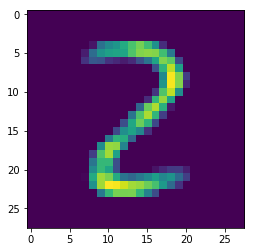

In [47]:
plt.imshow(decoded_imgs[3][0])

decoded_imgs.shape

In [48]:
test_images_clean = decoded_imgs 

assert test_images_clean.ndim == 4
assert test_images_clean.shape[0] == 2000
assert test_images_clean.shape[1] == 1
assert test_images_clean.shape[2] == 28
assert test_images_clean.shape[3] == 28

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('test_images_clean.npy', test_images_clean)

In [50]:
test_images_clean.shape[2]


28